<div class="alert alert-success">  
    
-------
# XArray 101 🌍  
-------
* Jupyter and Python Basics
    * Numpy
    * __Matplotlib__
    * Pandas
* Xarray Intro
* Xarray Advanced
* Vector Data
* Remote Sensing
* Visualization

-------  
</div>

# Basic plotting in Python: Matplotlib

**Note:** Parts of this notebook are inspired by the Notebook of Chapter 9 of the excellent [Python for Data Analysis Book](https://www.oreilly.com/library/view/python-for-data/9781491957653/) by Wes McKinney (the creator of pandas).
The original notebook is located [here](https://nbviewer.jupyter.org/github/pydata/pydata-book/blob/2nd-edition/ch09.ipynb).


The core plotting layer for most python plotting libs is [matplotlib](https://matplotlib.org). 
Initially, it was modeled after the Matlab plotting routines. It's been
around for a long time and is very solid but may seem a bit clunky at first.

Some of the more modern packages have nicer visuals by default, but you can tweak
matplotlib a lot and can also make it look more modern. Furthermore, a lot of the 
other packages will use matplotlib as a back-end. This is nice since you then can alter
them as you would with pure matplotlib plots.

What also makes it a bit confusing for newcomers is a) that it's pretty low level and that b)
it can be used with two paradigms: the matlab-style state-based model and the object-oriented (OO) model.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
import numpy as np

## The two Matplotlib Plotting APIs

Just a brief comparison...

### MATLAB-style stateful plotting flavor

This interface is stateful (it keeps track of the "current" figure and axes, you can get a reference to them with `plt.gcf()` (get current figure) and `plt.gca()` (get current axes).

The interface is fast and convenient for simple plots. However, it can be nasty for more complex pots (i.e. mulitple panels). IMHO, do not use this for your work. The OO-style is almost as easy to use and much more powerful... However, you often might want to mix it in so it's good to know. 

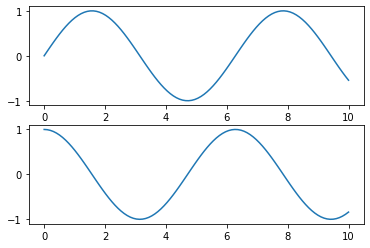

In [3]:
# some data
x = np.linspace(0, 10, 100)

# create a plot figure
plt.figure()

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### Object-oriented flavor

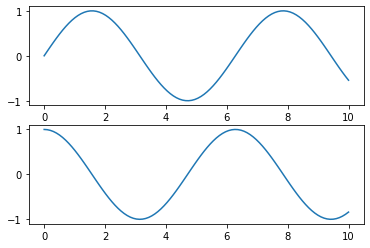

In [4]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## The Basics
**Note:** It's quite common to mix and match the two interface styles.

### Figures and subplots

As you can see, we always start with `figure`, `subplot` and `axes` objects. You can think of figure
as the canvas and axes as an individual plot with its x/y-axis, ticks, labels and the actual plots. A figure can be composed by multiple subplots which each being addressed by its own axis.

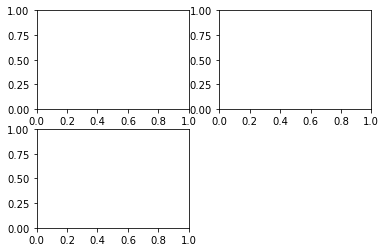

In [5]:
# the manual way to compose a figure with three subplots
fig = plt.figure()
# the numbers are: row, column, number of plot
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Matlotlib (MPL) uses a code to represent linestyle, cymbols or color. Here, we want a black (`k`) dashed (`--`) line. 

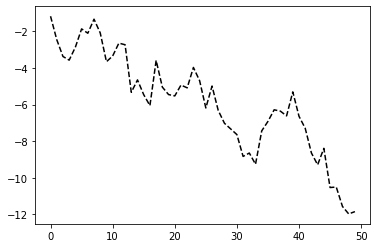

In [6]:
plt.plot(np.random.randn(50).cumsum(), 'k--');

Now we do a more complicated plot. It is composed of two subplots, with a histogram on the left and a scatter plot on the right. We specify a plot size of 14x4 inches.

We also use 20 bins for the histogram and fill the bars with black (30% opacity).

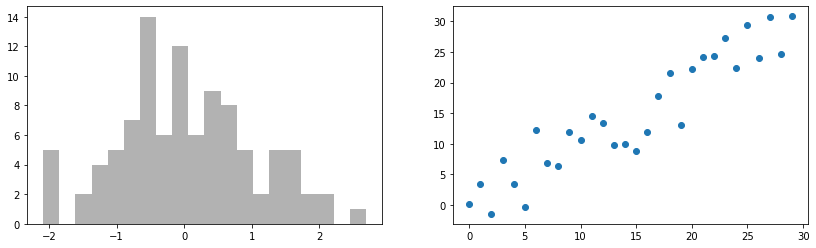

In [7]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30));

In [8]:
plt.close('all')

A more common way to create a figure with subplots is:

```python
fig, axes = plt.subplots(2, 3)
```

This would create a figure with 6 subplots (2 rows, 3 columns).

Now, let's compose a 2x2 plot with shared axes and histograms. We also adjust the space between the plots for a more compact plot.

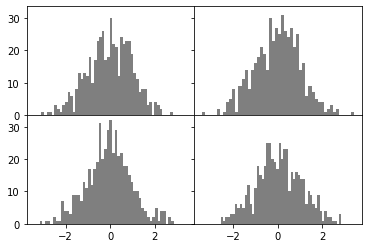

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## Colors, Markers and line styles

As mentioned above, you can adjust markers and styles with a special syntax. `ko--` would create a ine plot (dashed) with marker circles in black.

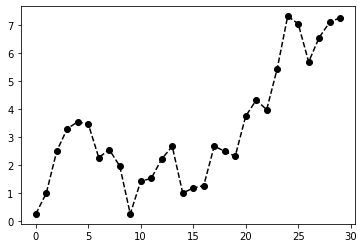

In [10]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--');

In [11]:
plt.close('all')

You can combine multiple plots into an axis and create a legend that's composed from labels attached to the plot commands...

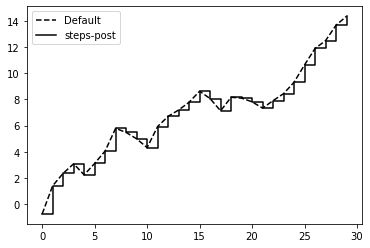

In [12]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best');

## Ticks, labels and legends

Se can customize all parts of the plots. I.e., we can set custom ticks and labels.

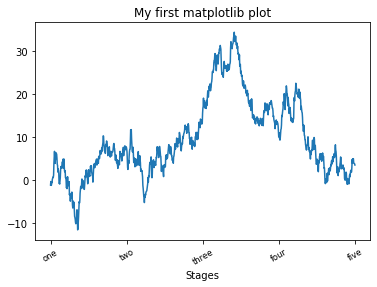

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# now we define custom tick positions and tick labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

# set a title and an axis label
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages');

As previously shown above, it's easy to add legends (see the guide [[here]](https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html) for more details...

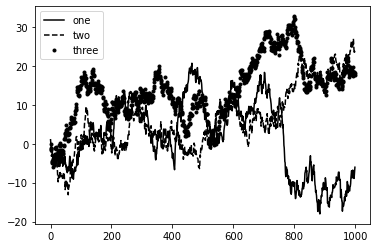

In [14]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three');

# add legend to the best location (repart the plot by
# running the cell multiple times to see it in action)
ax.legend(loc='best');

## Saving files to disk

It's easy to save the figure to disc. You can specify the file type to `pdf` or `png`:

```python

# plot my stuff, then...
plt.savefig('figure.png', dpi=400, bbox_inches='tight')

# and as a pdf
plt.savefig('figure.pdf', bbox_inches='tight')
```

`bbox_inches='tight'` is required to avoid unnecessary whitespace around figures...



### Change the plot style

As this is a common complaint about matplotlib: you can actually style your plots in matplotlib. 

```python
plt.style.use('seaborn-whitegrid')
```

Below are some examples (source - also click for more examples: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html):

![](https://matplotlib.org/3.1.1/_images/sphx_glr_style_sheets_reference_001.png)
![](https://matplotlib.org/3.1.1/_images/sphx_glr_style_sheets_reference_026.png)
![](https://matplotlib.org/3.1.1/_images/sphx_glr_style_sheets_reference_006.png)



And a note on confusing differences in the API.

Consider this simple plot:

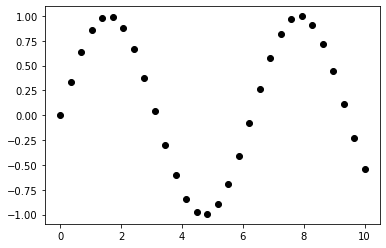

In [15]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Matplotlib can be used with a bit of an archaic syntax for specifying linstyles, symbols and colors in very short argument form.

Take a look at this example:

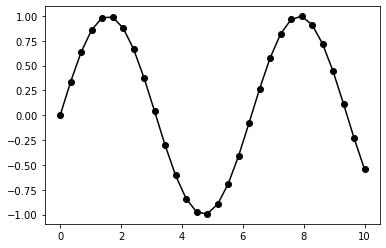

In [16]:
plt.plot(x, y, 'o-k');

This could also be written as:

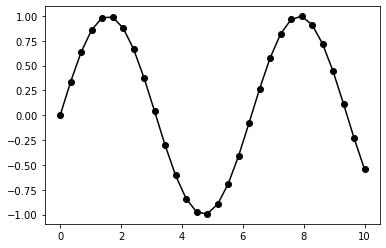

In [17]:
plt.plot(x, y, 'o', ls='-', c='k');

Or even more verbose (but actually readable):

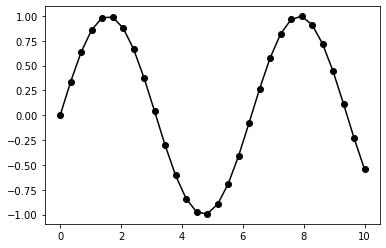

In [18]:
plt.plot(x, y, 'o', linestyle='-', color='black');

Use scatter instead of plot if you want to control aspects of the points with data...

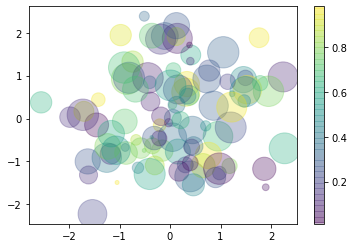

In [19]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

This is much more versatile and already halfway towards the more modern plottings libraries.

## Closing early...

We have to leave it at that since we cannot dive well into `matplotlib` in this course. We will use mostly
other libraries to get results fast, but some matplotlib might crop up occasionally.

However, you can always - and should - consult the excellent matplotlib documentation/ gallery with its vast number of
examples.

[Matplotlib gallery](https://matplotlib.org/gallery/index.html)